# Result from OpenAi are good but messy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_colwidth', 1500)

In [3]:
# First, working on the DS after classificaiton by LLM

csv_file_path = '../data/raw_train_tweets_classified_open_ai.csv'
df = pd.read_csv(csv_file_path)
df

,index,text,clean_text,classification,error
0,0,@thediscovietnam coo. thanks. just dropped you a line.,@thediscovietnam coo. thanks. just dropped you a line.,1,NaN
1,1,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?","@thediscovietnam shit it ain't lettin me DM you back, what's your email?",1,NaN
2,2,"@thediscovietnam hey cody, quick question...can you dm me?","@thediscovietnam hey cody, quick question...can you dm me?",1,NaN
3,3,@smokinvinyl dang. you need anything? I got some left over meds!,@smokinvinyl dang. you need anything? I got some left over meds!,0,No\n\nThe message contains a missing period at the end of the sentence.
4,4,"maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!","maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!",1,NaN
...,...,...,...,...,...
29925,29925,AfricaNews - KENYA: IS GREEN ENERGY POSSIBLE? - Fred Oluoch http://bit.ly/5MxYL3 [blog],AfricaNews - KENYA: IS GREEN ENERGY POSSIBLE? - Fred Oluoch http://bit.ly/5MxYL3 [blog],1,NaN
29926,29926,Green energy news - The Dane with green energy for Europe http://bit.ly/8CwyAg Check this out,Green energy news - The Dane with green energy for Europe http://bit.ly/8CwyAg Check this out,1,NaN
29927,29927,Green energy update Trudie Styler - http://bit.ly/5k8lso [video],Green energy update Trudie Styler - http://bit.ly/5k8lso [video],1,NaN
29928,29928,"ForestExplorers: Dams, bio-fuel plantations cannot be classified ... http://bit.ly/8teKxq [blog]","ForestExplorers: Dams, bio-fuel plantations cannot be classified ... http://bit.ly/8teKxq [blog]",1,NaN


In [4]:
# Working with html decoded text only
df.drop('text', axis=1, inplace=True)

In [5]:
# Index is not needed now
df.drop('index', axis=1, inplace=True)

In [6]:
# classification - checking with some issues there
(~df['classification'].isin([0, 1])).any()

False

In [7]:
# check the df
rand_lines = df.sample(5)
rand_lines

,clean_text,classification,error
23777,Quick Review of Some of This Year's Most Talked About NASCAR ... http://bit.ly/7sj6k5,1,NaN
26328,@ryansievert where'd you run into Dave Eggers?,1,NaN
18484,RT @World_Wildlife: A Time for Tigers http://bit.ly/Fk5UK,1,NaN
12952,RT @SalBarrera: Mammogram madness costs major money http://tinyurl.com/ydjansu,1,NaN
6259,@Reesebo lmao!! yea im ready come on baby u takin forever!!,0,"No\n\nErrors:\n1. ""im"" should be ""I'm""\n2. ""takin"" should be ""taking"""


In [8]:
# check classification = 1
count_cells_value_1 = (df['classification'] == 1).sum()
count_cells_value_1

23441

In [9]:
# check classification = 0
count_cells_value_0 = (df['classification'] == 0).sum()
count_cells_value_0

6489

In [10]:
# making sure nothing slipped
count_cells_value_0 + count_cells_value_1 == len(df)

True

In [11]:
# fix classification - first issue, model say "yes" instead of yes
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('yes', na=False)]
len(filtered_rows_corrected)

608

In [12]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
12748,@Llen Spinrite,0,"""Yes"""
18725,@itsjuuhh how's your weekend?,0,"""Yes"""
17099,@evanthehermit what are you doing??,0,"""Yes"""
8811,@plancast np,0,"""Yes"""
3001,@ABCPublicity are you ready for 2010?,0,"""Yes"""


In [13]:
# safe to update thos lines to classificaiton = 1 and delete the error
condition = df['error'].str[:10].str.lower().str.contains('yes', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [14]:
# fix classification - no errors
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

206

In [15]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
21196,@kartel1911 -- GOTDAMN!!!!!!! lol. just BOTH...yes just BOTH! hahahahha,0,No errors found.
22998,Bestselling Guide How To Create Own Spa Products For Fun & Profit http://bit.ly/14ABxX,0,"""No errors found. The message adheres to standard spelling and grammar rules."""
27548,Toxic Flame Retardants PSA:Ocean Future Society is apart of a campaign to ban PBDE toxic flame retardants.http://tiny.cc/I3JWy Please vote!,0,"""No errors found. The message adheres to standard spelling and grammar rules."""
1889,"@WFMguy what kind of phone do you have? you can, it's better, or you can just set your phone up on the site, and text to 40404",0,"No errors found. ""Yes"""
19392,@BIGTEEK hey my baby how u,0,"No errors found. ""Yes"""


In [16]:
# specific for 'no errors found.""
filtered_rows_corrected = df[df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)]
len(filtered_rows_corrected)

142

In [17]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
1931,On a lighter note - GO (insert sports team from your high school or colllege) ... (in the past that's helped me mend fences with halfwits),0,No errors found.
23001,"interesting idea passive income online for you, no investment required, just keep brows wind open http://www.surfjunky.com/?r=maxiproxy",0,No errors found.
16872,"ReadWriteWeb.com: YouTube Videos Get Huger, High Def-er http://bit.ly/3iV51K Full http://bit.ly/3FmlXv",0,"""No errors found. The message adheres to standard spelling and grammar rules."""
26076,@paigeeybby OKAY I GOT IT! #$@%$*#( Go to Edit Profile>Contact Info>LJ User Messaging and change it to Registered Users in the box.,0,"No errors found. ""Yes"""
18195,@cherrykissesz y r u home it's a friday,0,"No errors found. ""y r u"" is an informal abbreviation commonly used on Twitter."


In [18]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [19]:
filtered_rows_corrected = df[df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)]
len(filtered_rows_corrected)

0

In [20]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

64

In [21]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
21860,RT @JasondCrabb: Free song! go to jasoncrabb.com click on country weekly icon and click. download free somebody like me.,0,No errors.
18081,Grab a seat to the home of the Pina Colada! Today’s Tware to San Juan…Cheers! See details @ http://tinyurl.com/yzm9tlc,0,No errors.
29158,RT @NancJ: EU to set new safety standards for sleeping products for newborns/young ...: Despite the frequency of serio.. http://bit.ly/OKFxz,0,No errors.
21207,Good Morning Arizona! @aafb needs your help! Skip a meal 2day and fund them with the savings! #twitterforfood http://ow.ly/ykxx,0,No errors.
26763,Why smartphones are not suffering in the recession http://bit.ly/12xcIa,0,No errors.


In [22]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors were found', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [23]:
# look for more errors
condition = ~df['error'].str.lower().str.startswith('yes', na=False) & ~df['error'].str.lower().str.startswith('no', na=False) & (df['error'] != '')

filtered_rows_not_start_with_yes_or_no = df[condition]
filtered_df_clean = filtered_rows_not_start_with_yes_or_no.dropna(subset=['error'])
len(filtered_df_clean)

337

In [24]:
filtered_df_clean.sample(5)

,clean_text,classification,error
28665,Find outout who’s unfollowing you www.useqwitter.com or www.tweeteffect.com #PJAlive,0,"""No"" \nErrors:\n1. ""Find outout"" should be ""Find out""\n2. ""who’s"" should be ""who is"" or ""who's""\n3. ""useqwitter.com"" should be ""useqwitter.com""\n4. ""tweeteffect.com"" should be ""tweeteffect.com"""
5567,Maine says 'NO to Same Sex Marriage - YES TO POT!' - Read The News Article Here: http://bit.ly/4D9hgS,0,"""No"" should be capitalized at the beginning of the sentence. The correct form is ""Maine says 'NO to Same-Sex Marriage - YES TO POT!' - Read the News Article Here: http://bit.ly/4D9hgS."""
9494,"@greggarvin 70% of cancer could b prevented if we lost weight, exercised regular,reduced red meat,ate diets rich in veg/fruit & quit smoking",0,"""No"" \nErrors:\n1. ""b"" should be ""be""\n2. ""exercised regular"" should be ""exercised regularly""\n3. ""ate diets"" should be ""ate diets""\n4. ""veg/fruit"" should be ""vegetables/fruits"""
7026,@dlrpmagic,0,Please provide a tweet for review.
27632,Twitter is deeaad,0,"""No, the correct spelling is 'dead.'"""


In [25]:
# last minute error message - 'no, there are no errors'
filtered_rows_corrected = df[df['error'].str.lower().str.contains('no, there are no errors', na=False)]
len(filtered_rows_corrected)

89

In [26]:
# set to 1, 'no, there are no errors'
condition = df['error'].str.lower().str.contains('no, there are no errors', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [27]:
df.sample(5)

,clean_text,classification,error
19880,Top 20 Most Popular Health Websites (I just thought you needed this. Check it out and thank me. lol) http://bit.ly/15bfs7,1,NaN
25913,Springfield 10 NW Arkansas 12.Cards Fall in 12 http://tiny.cc/beqz8. Next game is tomorrow against NW Arkansas game time set for 6:10pm.,1,NaN
672,@LilliJ hi Lil! Driving thru tennessee now! Are p early!,0,"No\n\nErrors:\n1. ""thru"" should be ""through""\n2. ""p"" should be ""pretty""\n3. ""early"" should be ""early."""
5586,@momsfocus I know right lol,1,NaN
24698,Hey are you any good at fantasy football? Put your money where your mouth is. http://tinyurl.com/yevvckn,1,NaN


In [28]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

61

In [29]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
10732,RT @robbi3_bird: #uknowitsarecession when u get xcited about new items on the dollar menu at fast food spots,0,No errors.
3847,the buzz will be down at NFL films on thursday when our films unit receives a green award from the state of new jersey,0,No errors.
7846,"RT @BlogTalkTEFS woke up with ""The Love Boat"" theme in its head and is still seriously proud of Jeff... http://bit.ly/sCfFR Tonight @ 11",0,No errors.
26763,Why smartphones are not suffering in the recession http://bit.ly/12xcIa,0,No errors.
10656,Our new lamp store is so close to being ready I can smell it. We have the lowest prices! Get excited to get all your projector lamps with us,0,No errors.


In [30]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors.', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [31]:
# clean_text - have to remove: @ only, singel url - THIS IS DONE IN CORE LEVEL, KEEPING FOR LEGACY ISSUES (older data, OpenAI done in days due to 10k rate limit)
condition = df['clean_text'].str.strip().str.startswith('@') & ~df['clean_text'].str.strip().str.contains(' ')
at_only_df = df[condition]
len(at_only_df)

150

In [32]:
# clean_text - have to remove: @ only, singel url
condition = df['clean_text'].str.strip().str.startswith('@') & ~df['clean_text'].str.strip().str.contains(' ')
at_only_df = df[condition]
len(at_only_df)

150

In [33]:
at_only_df.sample(5)

,clean_text,classification,error
7149,@steven_cuthill,0,"I'm sorry, but I need a Twitter message to review for spelling and grammar errors. Please provide a tweet for analysis."
7045,@chrisslusser,1,NaN
7009,@JamieEng,0,It seems like you forgot to include a message for me to review. Could you please provide the tweet you'd like me to analyze for spelling and grammar errors?
7007,@rwilkie,0,"I'm sorry, but I need a Twitter message to review for spelling and grammar errors. Please provide a tweet for analysis."
7145,@PascalDePauw,0,Please provide a tweet for review.


In [34]:
# Remove only @att, no need for calssfier here (it will be handled in the pre-process and no need to call model)
df = df[~condition]

In [35]:
df.sample(5)

,clean_text,classification,error
2792,Happy to be back after a great few days in Mexico City. What a place...go if you haven't,1,NaN
20029,'Many flee' Congo fishing clashes - Kikil News - http://bit.ly/5DnTp7,1,NaN
21369,"@ashpags Why, though? I kind of agree, but what difference does the company's approval of the network matter?",1,
15509,"#worldsthinnestbooks ""Backing Up Your Talk"" by Jimmy Rollins",1,NaN
2249,@roder It's got everything you need: football and sex :D,1,NaN


In [36]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

0

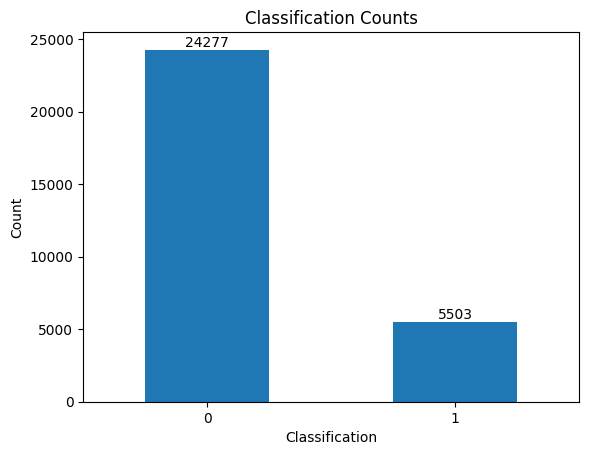

In [37]:
# See what we got
classification_counts = df['classification'].value_counts()
classification_counts.plot(kind='bar')
plt.title('Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0) 
for index, value in enumerate(classification_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

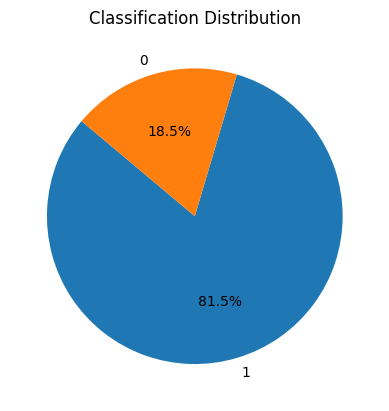

In [38]:
classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Classification Distribution')
plt.ylabel('')  
plt.show()

In [39]:
len(df)

29780

In [40]:
df.sample(5)

,clean_text,classification,error
27405,Jim Rome gives love to Ricky Williams and #yoga. #jribonespn #dolphins #nfl,1,NaN
14031,The Sad Truth About Making Money With Twitter:,1,NaN
5091,Movie review: The Twilight Saga: New Moon *** http://bit.ly/2W4MKP,1,NaN
28982,I stunned my wife in. I borrowed a PURPLE lanyard from a friend inside and that was the key.,0,"No, there are two errors in the message:\n1. ""I stunned my wife in."" - It should be ""I stunned my wife. I borrowed a PURPLE lanyard from a friend inside, and that was the key."" The sentence is incomplete and needs to be separated for clarity.\n2. ""PURPLE"" should not be in all capital letters unless it is an acronym."
10762,I Just saw some guy run over a kids scooter in Opa-Locka. What an afternoon!,1,NaN


In [41]:
# Now save to allow model train 
df.to_csv('../data/clean_train_tweets_classified_open_ai.csv', index=False)